In [2]:
import pandas as pd



In [3]:
teams = pd.read_csv("teams.csv")

teams


,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [4]:
teams = teams[["team", "country","year","athletes","age", "prev_medals", "medals"]]
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [5]:

numeric_data = teams.select_dtypes(include=[float, int])
numeric_data.corr()['medals'] 


year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

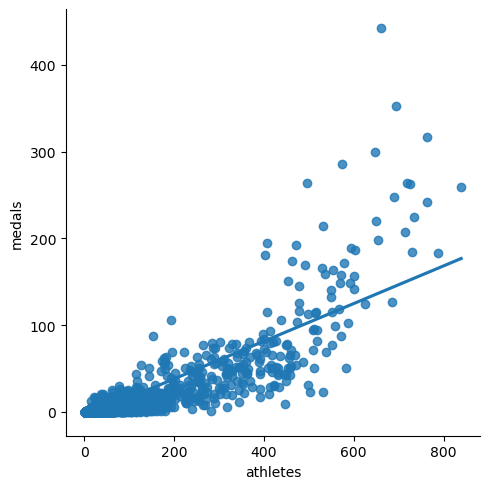

In [6]:
import seaborn as sns
sns.lmplot(x="athletes", y="medals", data = teams, fit_reg= True, ci=None)

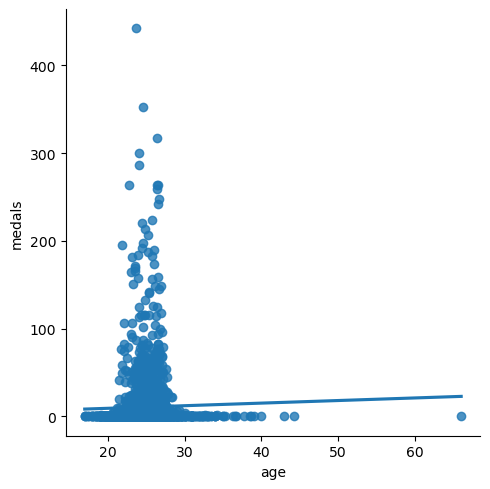

In [7]:
sns.lmplot(x='age', y='medals',data = teams, fit_reg=True, ci=None)

<AxesSubplot:ylabel='Frequency'>

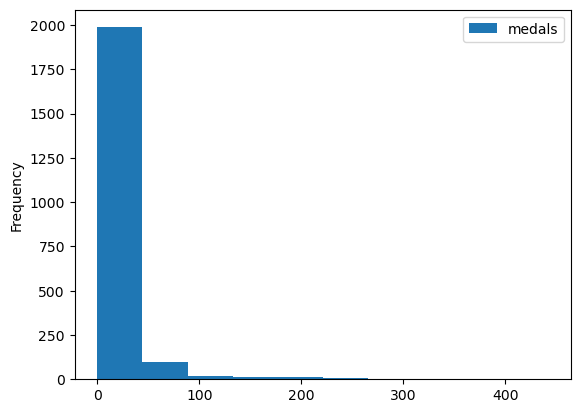

In [8]:
teams.plot.hist(y="medals")

In [9]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


In [10]:
teams = teams.dropna()
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [11]:
train = teams[teams['year'] <=2012].copy()
test = teams[teams['year'] >2012].copy()

train.shape


(1813, 7)

In [12]:
test.shape

(201, 7)

In [13]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()

In [14]:
predictors = ["athletes","prev_medals"]
target = "medals"


In [15]:
reg.fit(train[predictors], train["medals"])
LinearRegression()

LinearRegression()

In [16]:
predictions = reg.predict(test[predictors])
test["predictions"] = predictions
test

,team,country,year,athletes,age,prev_medals,medals,predictions
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.156055
25,ALB,Albania,2016,6,23.7,0.0,0,-1.662411
38,ALG,Algeria,2016,74,24.0,1.0,2,4.076716
49,AND,Andorra,2016,4,26.0,0.0,0,-1.809813
58,ANG,Angola,2016,26,27.5,0.0,0,-0.188391
...,...,...,...,...,...,...,...,...
2091,VIE,Vietnam,2016,28,26.9,0.0,2,-0.040989
2099,VIN,Saint Vincent and the Grenadines,2016,4,20.8,0.0,0,-1.809813
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.883514
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.588710


In [17]:
test.loc[test["predictions"] < 0, "predictions"] = 0
test["predictions"] = test["predictions"].round()
test

,team,country,year,athletes,age,prev_medals,medals,predictions
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
38,ALG,Algeria,2016,74,24.0,1.0,2,4.0
49,AND,Andorra,2016,4,26.0,0.0,0,0.0
58,ANG,Angola,2016,26,27.5,0.0,0,0.0
...,...,...,...,...,...,...,...,...
2091,VIE,Vietnam,2016,28,26.9,0.0,2,0.0
2099,VIN,Saint Vincent and the Grenadines,2016,4,20.8,0.0,0,0.0
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0


In [18]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test['predictions'], test['medals'])
error

3.4477611940298507

In [19]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [20]:
test[test['team']== "USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2054,USA,United States,2016,719,26.4,248.0,264,231.0


In [21]:
test[test["team"]=="ZIM"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2143,ZIM,Zimbabwe,2016,31,27.5,0.0,0,0.0


In [23]:
test[test["team"]=="IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
908,IND,India,2016,130,26.1,6.0,2,12.0


In [25]:
errors = (test["medals"]- test["predictions"]).abs()
errors 

7       0.0
25      0.0
38      2.0
49      0.0
58      0.0
       ... 
2091    2.0
2099    0.0
2111    0.0
2132    0.0
2143    0.0
Length: 201, dtype: float64

In [27]:
error_by_team = errors.groupby(test['team']).mean()
error_by_team

team
AFG    0.0
ALB    0.0
ALG    2.0
AND    0.0
ANG    0.0
      ... 
VIE    2.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.0
Length: 201, dtype: float64